# **1. Perkenalan Dataset**


1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari sumber public repositories yaitu [Kaggle](https://www.kaggle.com/datasets/azizp123/simnangkis-eksport-mlati)
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak memiliki label atau kelas.
   - **Jumlah Baris**: Memiliki 23567 baris dan terdiri dari 44 atribut yang pastinya dataset ini cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, id_hub_rumah_tangga, id_nikah, id_difable, id_penyakit_kronis, dll.
     - *Numerikal*: Misalnya usia, jmlh_anggota_keluarga, luas_lantai, jumlah_kamar, dll.

3. **Tentang Dataset**:  
   Dataset ini merupakan kumpulan data yang berisi informasi mengenai kondisi sosial ekonomi warga di Kecamatan Mlati, Kabupaten Sleman tahun 2023. Dataset ini diperoleh dari SIMNANGKIS (Sistem Informasi Manajemen Penanggulangan Kemiskinan) Dinas Sosial Kabupaten Sleman pada bulan Juli 2023 dengan tujuan untuk memetakan kondisi kemiskinan dan kesejahteraan warga di wilayah tersebut.Dataset ini memiliki total 23567 baris dan terdiri dari 44 atribut yang mencakup berbagai aspek rumah tangga dan individu. Atribut-atribut dalam dataset ini mencakup data demografis, kondisi hunian, tingkat pendidikan, kondisi kesehatan, status pekerjaan, dan kepemilikan aset

4. **Tujuan Membuat Model**
   Tujuan utama dari pembuatan model clustering ini adalah untuk mengelompokkan keluarga berdasarkan kondisi sosial ekonomi mereka ke dalam kategori kebutuhan bantuan sosial. Dalam konteks ini, pendekatan unsupervised learning melalui metode clustering digunakan karena tidak terdapat label atau kelas dalam dataset awal.
      
   Secara umum, target kategorisasi yang ingin dicapai adalah sebagai berikut: 
      - Sangat Membutuhkan Bantuan
      - Membutuhkan Bantuan
      - Belum Membutuhkan Bantuan

   Namun demikian, jumlah kelompok (cluster) akhir dapat berubah secara dinamis berdasarkan hasil evaluasi dari metode penentuan jumlah cluster optimal, seperti metode Elbow atau Silhouette Score. Hal ini dimaksudkan untuk memastikan bahwa pembagian kelompok benar-benar mencerminkan struktur alami dalam data, dan tidak semata-mata dipaksakan sesuai keinginan awal.

   Hasil clustering ini nantinya akan digunakan sebagai label untuk proses supervised learning (klasifikasi), dengan harapan dapat membangun sebuah model machine learning yang mampu memprediksi tingkat kebutuhan bantuan sosial keluarga berdasarkan karakteristik sosial-ekonomi mereka.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [23]:
# Membaca dataset pelanggan mall dari URL dan menampilkan 5 baris pertama
df = pd.read_csv('simnangkis_eksport_mlati.csv')
df.head()

,status,id_kelamin,kelurahan,id_hub_rumah_tangga,id_hub_keluarga,usia,id_nikah,id_difable,id_penyakit_kronis,id_partisipasi_sekolah,...,ada_sepeda,ada_motor,ada_mobil,ada_perahu,ada_motor_tempel,ada_perahu_motor,ada_kapal,aset_tak_bergerak,rumah_lain,sta_art_usaha
0,miskin,Perempuan,Sendangadi,Anak,3.0,20.0,Belum kawin,Tidak cacat,Tidak Memiliki Penyakit Kronis,Tidak bersekolah lagi,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,Tidak,Tidak
1,miskin,Perempuan,Sendangadi,Anak,3.0,22.0,Belum kawin,Tidak cacat,Tidak Memiliki Penyakit Kronis,Tidak bersekolah lagi,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,Tidak,Tidak
2,miskin,Perempuan,Sendangadi,Kepala rumah tangga,1.0,41.0,Cerai hidup,Tidak cacat,Tidak Memiliki Penyakit Kronis,Tidak bersekolah lagi,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,Tidak,Tidak
3,miskin,Laki-laki,Sendangadi,Anak,3.0,40.0,Belum kawin,Tidak cacat,Tidak Memiliki Penyakit Kronis,Tidak bersekolah lagi,...,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,Tidak,Tidak
4,miskin,Perempuan,Sendangadi,Istri/suami,2.0,67.0,Kawin/nikah,Tidak cacat,Tidak Memiliki Penyakit Kronis,Tidak bersekolah lagi,...,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,Tidak,Tidak


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [24]:
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23567 entries, 0 to 23566
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   status                  23567 non-null  object 
 1   id_kelamin              23567 non-null  object 
 2   kelurahan               23567 non-null  object 
 3   id_hub_rumah_tangga     23567 non-null  object 
 4   id_hub_keluarga         23567 non-null  float64
 5   usia                    23567 non-null  float64
 6   id_nikah                23567 non-null  object 
 7   id_difable              23567 non-null  object 
 8   id_penyakit_kronis      23567 non-null  object 
 9   id_partisipasi_sekolah  23567 non-null  object 
 10  jml_anggota_keluarga    23567 non-null  int64  
 11  sta_bangunan            23567 non-null  object 
 12  sta_lahan               23567 non-null  object 
 13  luas_lantai             23567 non-null  float64
 14  lantai                  23567 non-null

Dari hasil output df.info(), kita dapat melihat bahwa dataset ini terdiri atas 23567 baris dan 44 kolom. Berikut adalah detail dari setiap kolom.

In [25]:
# Menampilkan statistik deskriptif dari dataset untuk kolom numerik
df.describe()

,id_hub_keluarga,usia,jml_anggota_keluarga,luas_lantai,lantai,dinding,atap,jumlah_kamar,sumber_air_minum,daya,bb_masak,kloset,buang_tinja
count,23567.000000,23567.000000,23567.000000,23567.000000,23567.00000,23567.000000,23567.000000,23567.000000,23567.000000,23567.000000,23567.000000,23567.000000,23567.000000
mean,2.070565,37.209488,3.330123,492.653414,4.21441,1.017864,4.016124,2.229898,5.829168,1.740612,4.140960,1.192388,1.645394
std,1.036212,19.381985,1.269834,474.155231,2.07270,0.183495,0.423663,0.883679,1.015124,1.377450,2.159943,0.652316,0.943124
min,1.000000,0.000000,1.000000,0.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,20.000000,2.000000,90.000000,2.00000,1.000000,4.000000,2.000000,6.000000,1.000000,3.000000,1.000000,1.000000
50%,2.000000,38.000000,3.000000,470.000000,4.00000,1.000000,4.000000,2.000000,6.000000,1.000000,3.000000,1.000000,1.000000
75%,3.000000,52.000000,4.000000,700.000000,6.00000,1.000000,4.000000,3.000000,6.000000,2.000000,3.000000,1.000000,2.000000
max,8.000000,100.000000,15.000000,6060.000000,10.00000,7.000000,10.000000,22.000000,12.000000,6.000000,9.000000,4.000000,6.000000


In [26]:
print("\nJumlah nilai yang hilang per kolom:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Jumlah nilai yang hilang per kolom:
Series([], dtype: int64)


Dari data kita ini, tidak ada missing value

In [27]:
duplicates = df[df.duplicated()]

print(duplicates)

Empty DataFrame
Columns: [status, id_kelamin, kelurahan, id_hub_rumah_tangga, id_hub_keluarga, usia, id_nikah, id_difable, id_penyakit_kronis, id_partisipasi_sekolah, jml_anggota_keluarga, sta_bangunan, sta_lahan, luas_lantai, lantai, dinding, kondisi_dinding, atap, kondisi_atap, jumlah_kamar, sumber_air_minum, cara_peroleh_air_minum, sumber_penerangan, daya, bb_masak, fas_bab, kloset, buang_tinja, ada_tabung_gas, ada_lemari_es, ada_ac, ada_pemanas, ada_telepon, ada_tv, ada_emas, ada_laptop, ada_sepeda, ada_motor, ada_mobil, ada_perahu, ada_motor_tempel, ada_perahu_motor, ada_kapal, aset_tak_bergerak, rumah_lain, sta_art_usaha]
Index: []

[0 rows x 46 columns]


Tidak ada data duplikat juga

In [28]:
# Ambil semua kolom numerik
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Statistik deskriptif
df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
id_hub_keluarga,23567.0,2.070565,1.036212,1.0,1.0,2.0,3.0,8.0
usia,23567.0,37.209488,19.381985,0.0,20.0,38.0,52.0,100.0
jml_anggota_keluarga,23567.0,3.330123,1.269834,1.0,2.0,3.0,4.0,15.0
luas_lantai,23567.0,492.653414,474.155231,0.0,90.0,470.0,700.0,6060.0
lantai,23567.0,4.214410,2.072700,1.0,2.0,4.0,6.0,10.0
dinding,23567.0,1.017864,0.183495,1.0,1.0,1.0,1.0,7.0
atap,23567.0,4.016124,0.423663,1.0,4.0,4.0,4.0,10.0
jumlah_kamar,23567.0,2.229898,0.883679,0.0,2.0,2.0,3.0,22.0
sumber_air_minum,23567.0,5.829168,1.015124,1.0,6.0,6.0,6.0,12.0
daya,23567.0,1.740612,1.377450,1.0,1.0,1.0,2.0,6.0


Kita lihat dari hasil code deskripsi diatas kita mendatpkan beberap isight singkat sebagai beriku :
- Usia: Rata-rata 37 tahun, rentang 0-100, median 38, menunjukkan populasi merata dari anak hingga lansia.
- Jumlah Anggota Keluarga: Rata-rata 3.3 orang, median 3, maksimum 15, mengindikasikan kebanyakan keluarga kecil hingga sedang.
- Luas Lantai: Rata-rata 492 m², median 470 m², tapi ada nilai ekstrem (6060 m²) dan minimum 0, menunjukkan variasi besar. (Mungkin ada outlier)
- Jumlah Kamar: Rata-rata 2.2, median 2, maksimum 22, mayoritas rumah kecil tapi ada outlier.
- Daya Listrik: Rata-rata 1.74 (mungkin 450-900 watt), median 1, menunjukkan mayoritas keluarga dengan daya rendah.
- Sumber Air Minum: Rata-rata 5.8, median 6, menunjukkan ketergantungan pada satu jenis sumber dominan.
- Bahan Bakar Masak: Rata-rata 4.1, median 3, mayoritas menggunakan bahan bakar tertentu (mungkin gas).
- Sanitasi (Kloset & Buang Tinja): Rata-rata ~1.2-1.6, median 1, menunjukkan fasilitas dasar dominan.

Untuk melihat outlier mari kita visualisaikan data numerik ke dalam bentuk Boxplot


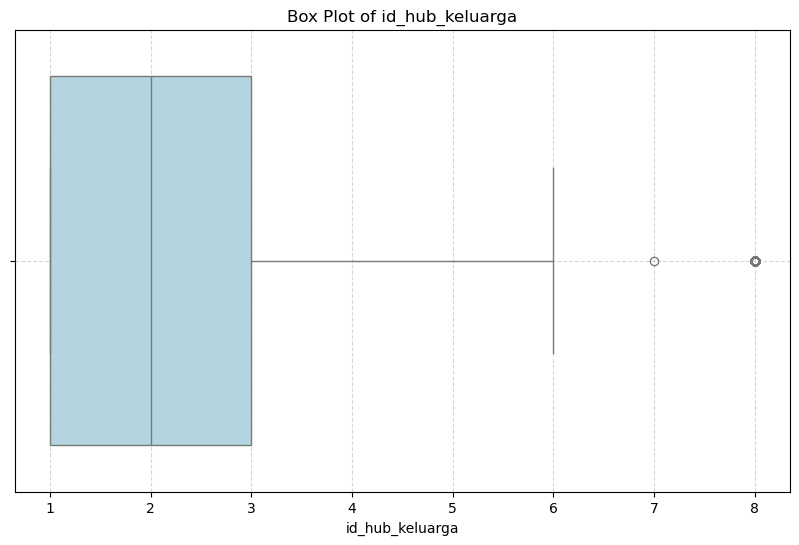

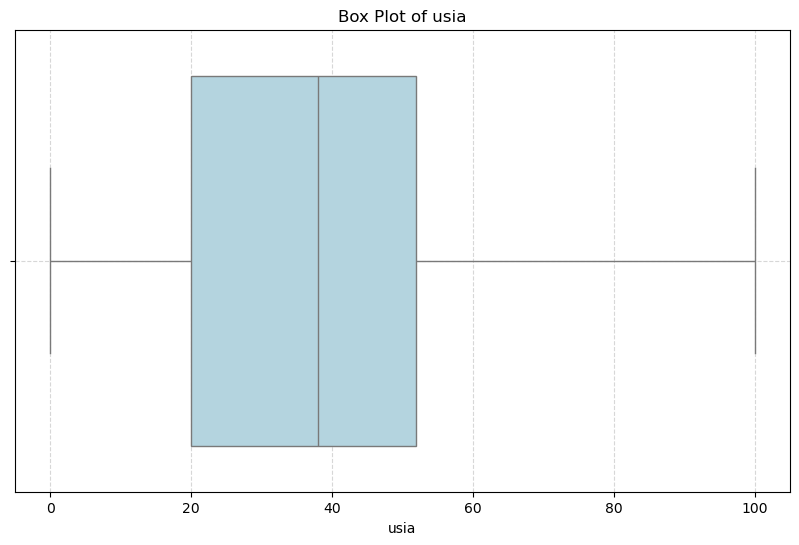

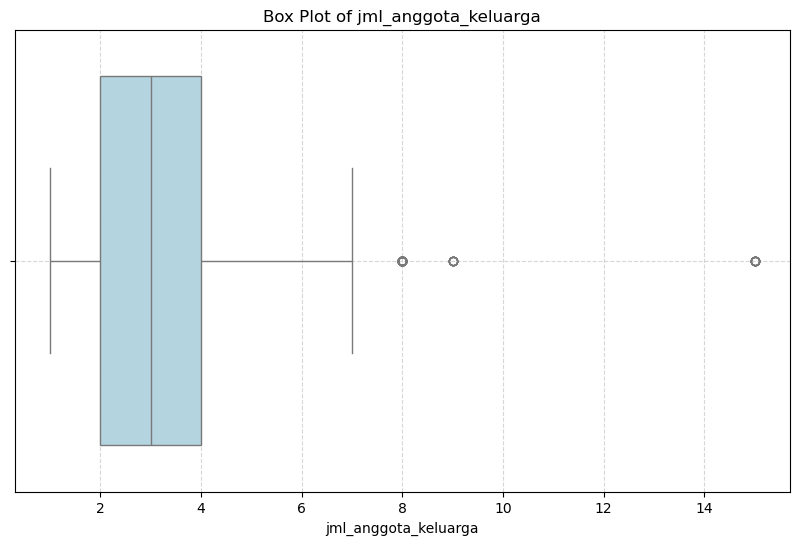

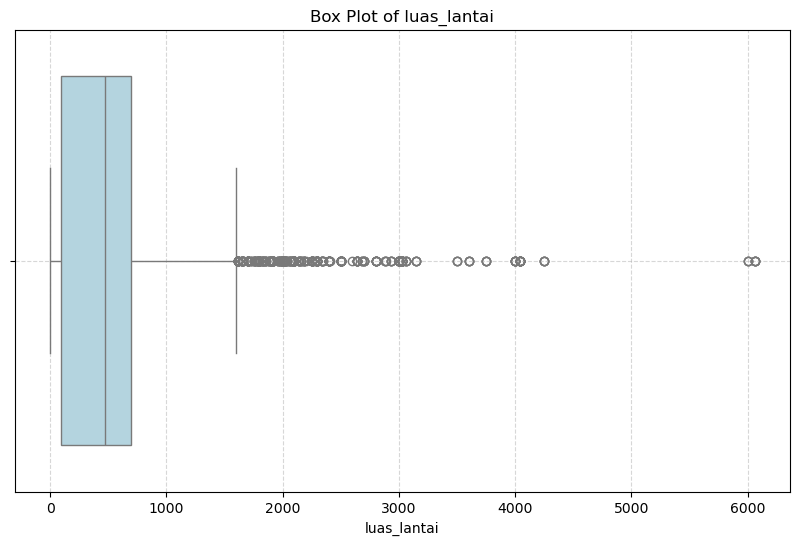

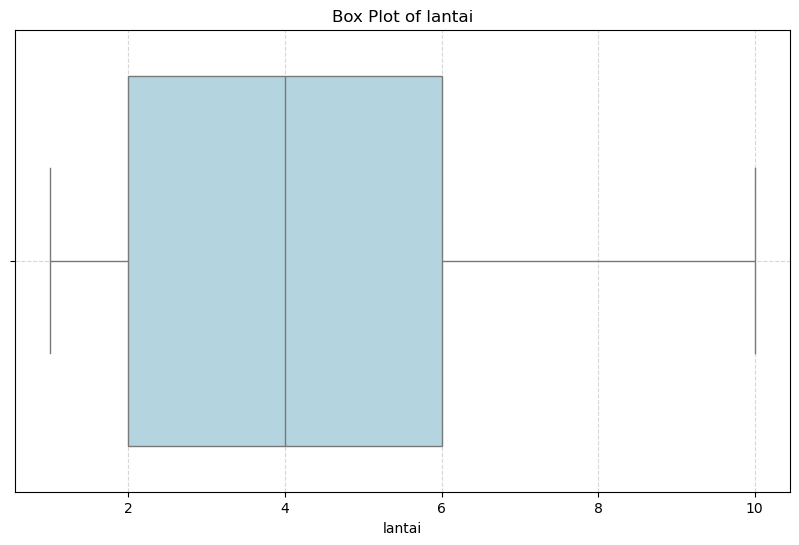

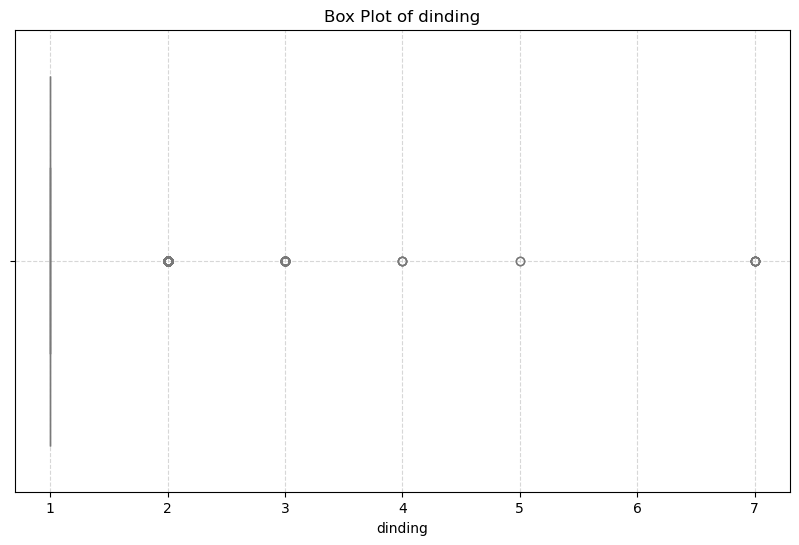

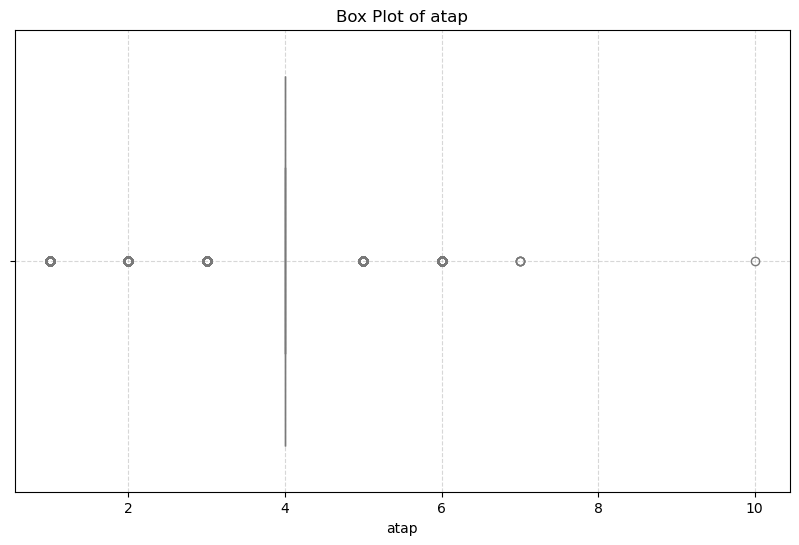

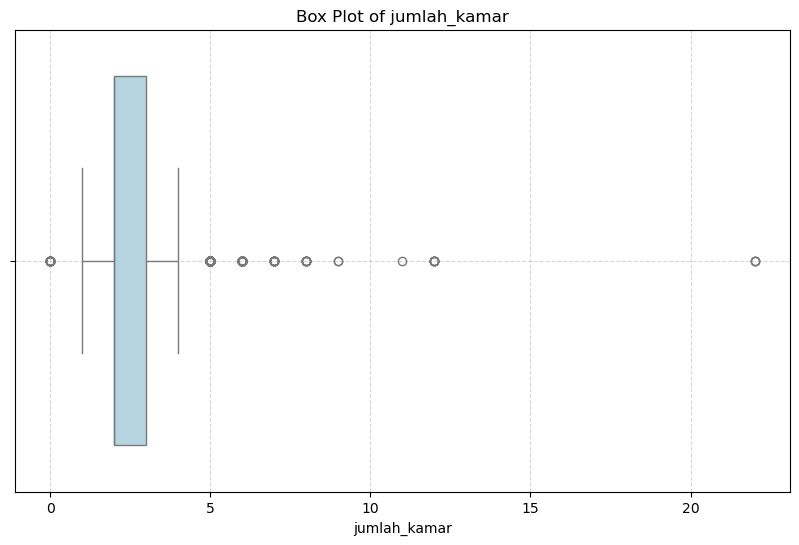

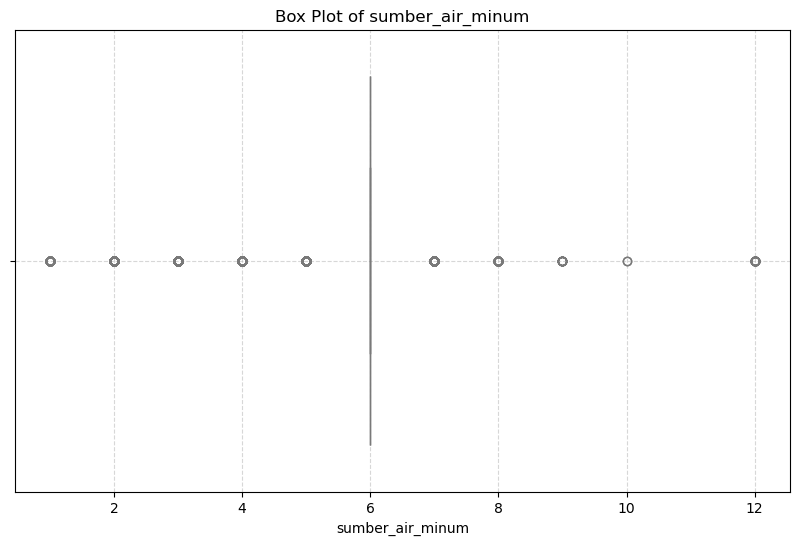

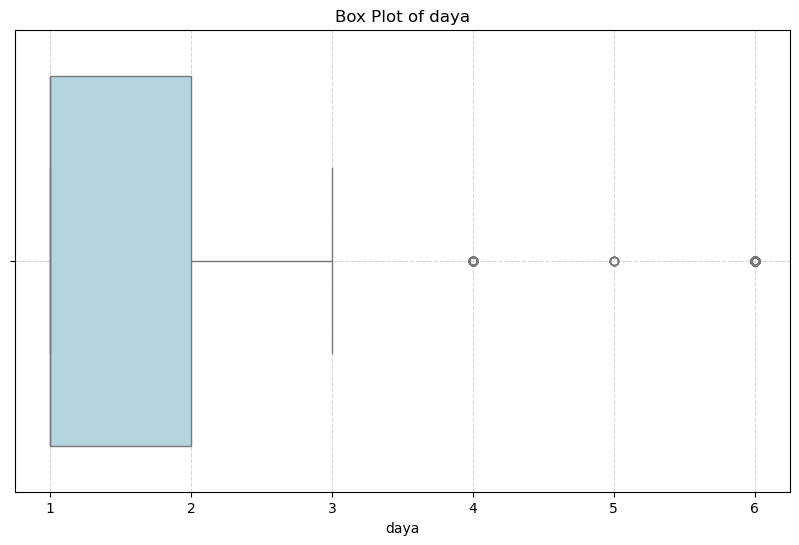

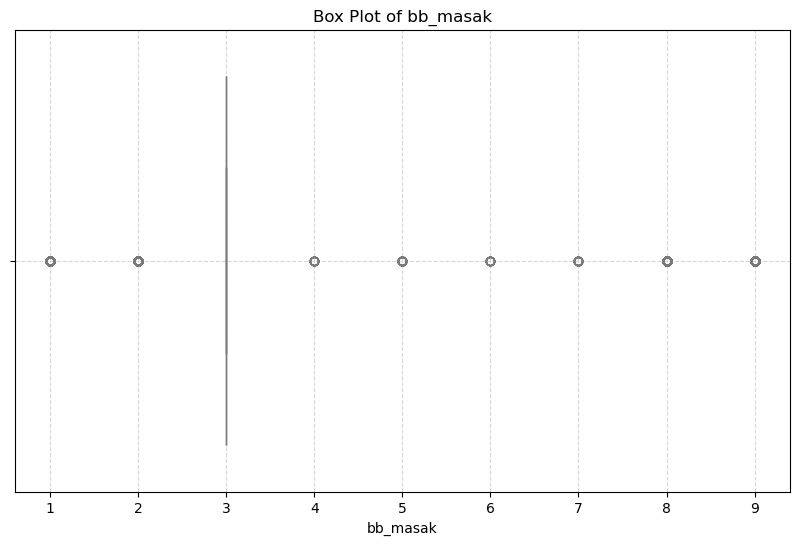

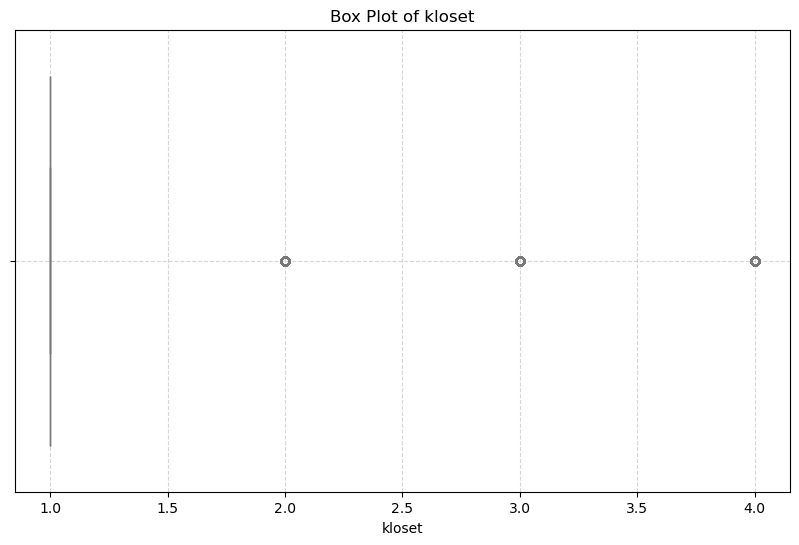

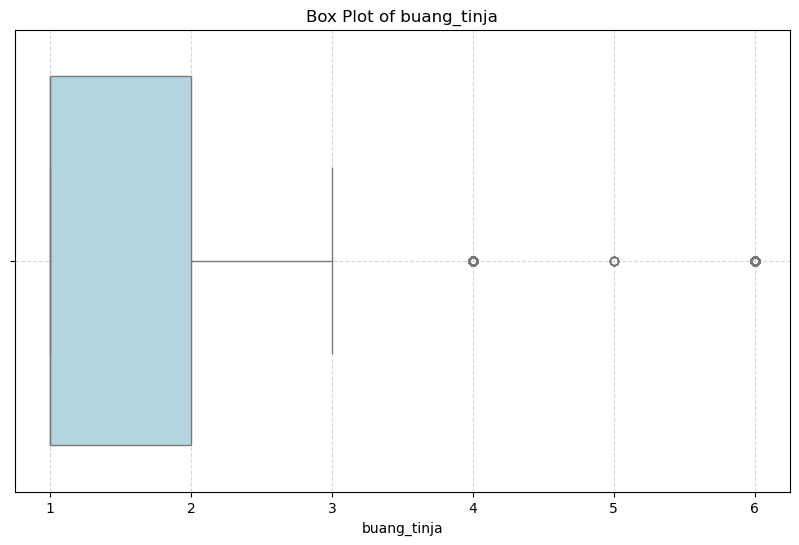

In [29]:
# Loop satu per satu dan tampilkan boxplot
for feature in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature], color='lightblue')
    plt.title(f'Box Plot of {feature}')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


Sangat banyak fitur numerik ini, namun nanti kita hanya memilih beberapa fitur saja berdasarkan fiture selection kita nanti.

Namun kita lihat disini beberapa colomn memeiliki data outlier seperti pada kolom luas lantai, namun nanti kita akan selesaikan.

Sekarang mari kita lihat korelasi setiap variable


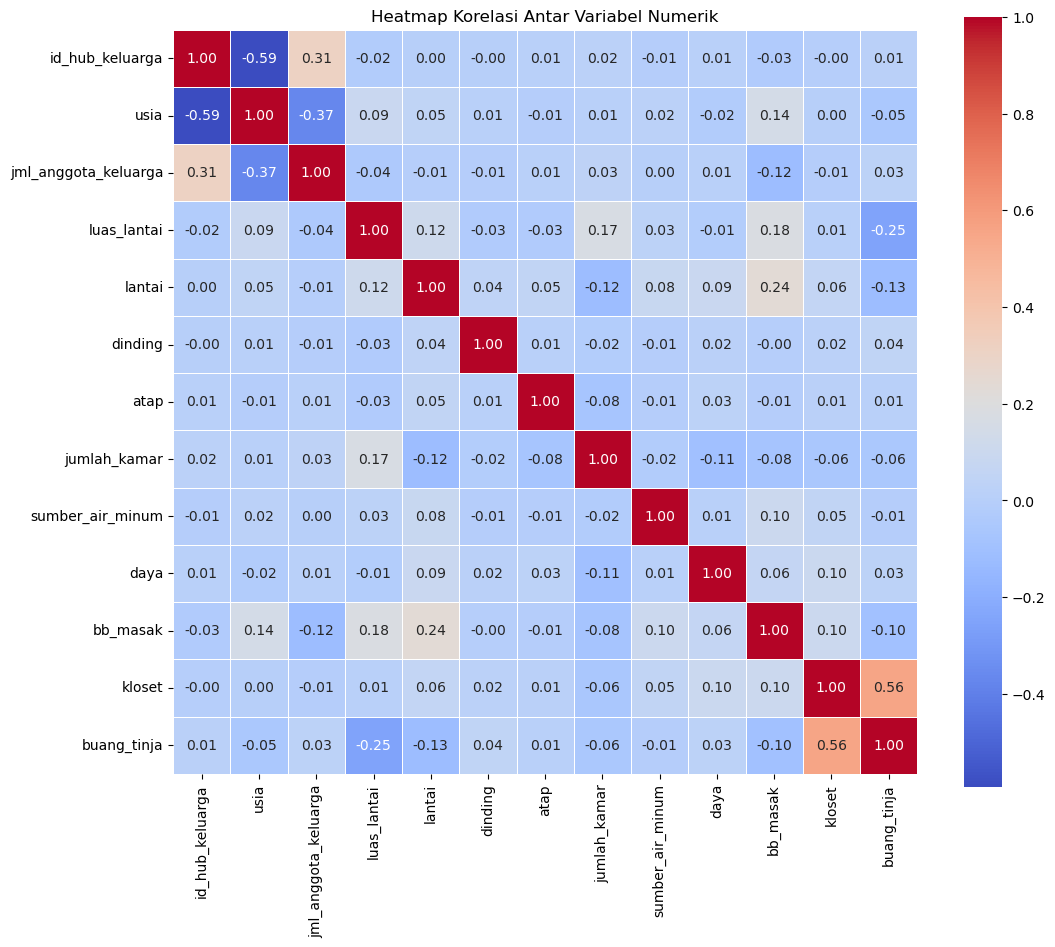

In [30]:
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_columns].corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

In [31]:
print("Matriks Korelasi:")
print(correlation_matrix.round(2))  

Matriks Korelasi:
                      id_hub_keluarga  usia  jml_anggota_keluarga  \
id_hub_keluarga                  1.00 -0.59                  0.31   
usia                            -0.59  1.00                 -0.37   
jml_anggota_keluarga             0.31 -0.37                  1.00   
luas_lantai                     -0.02  0.09                 -0.04   
lantai                           0.00  0.05                 -0.01   
dinding                         -0.00  0.01                 -0.01   
atap                             0.01 -0.01                  0.01   
jumlah_kamar                     0.02  0.01                  0.03   
sumber_air_minum                -0.01  0.02                  0.00   
daya                             0.01 -0.02                  0.01   
bb_masak                        -0.03  0.14                 -0.12   
kloset                          -0.00  0.00                 -0.01   
buang_tinja                      0.01 -0.05                  0.03   

               

Dataset ini menunjukkan populasi dengan usia rata-rata 37 tahun dan keluarga kecil (3.3 anggota), namun variasi luas lantai (0-6060 m²) dan jumlah kamar (0-22) mengindikasikan ketimpangan kondisi hunian. Mayoritas rumah memiliki fasilitas dasar seperti dinding tembok, atap genteng, daya listrik rendah (450 watt), dan sanitasi standar, dengan ketergantungan pada sumber air dan bahan bakar tertentu. Korelasi menonjolkan hubungan negatif kuat antara usia dan status keluarga (-0.59), serta keterkaitan fasilitas hunian seperti luas lantai dengan sanitasi (-0.25) dan bahan bakar (0.18), sementara sanitasi (kloset dan buang tinja) berkorelasi kuat (0.56), menunjukkan faktor kesejahteraan saling terkait meskipun banyak variabel independen.

Dan untuk Lebih dalam lagi mari kita lihat distribusi data numerikalnya menggunakan histogram yang menunjukkan nilai-nilai dalam fitur tersebut. Histogram ini dilengkapi dengan kurva densitas untuk memberikan gambaran lebih jelas tentang pola distribusi data: apakah data terdistribusi normal atau mengalami skewness?

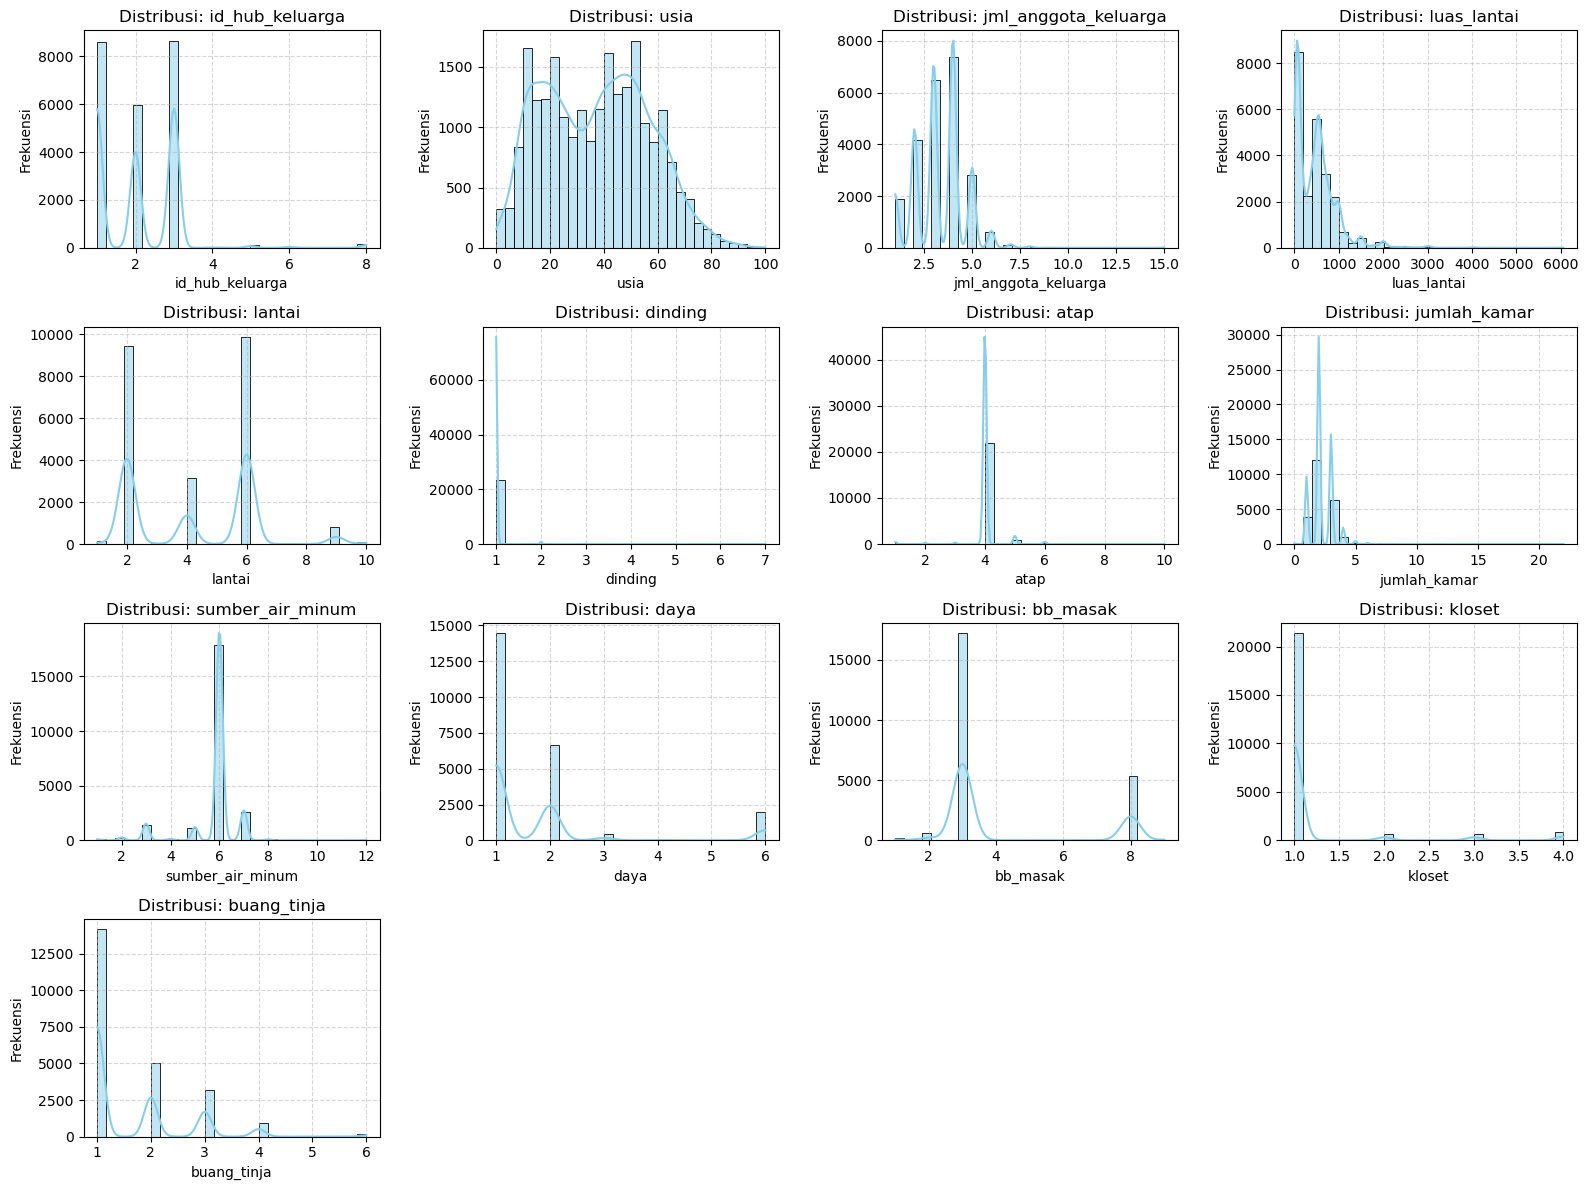

In [32]:
# Visualisasi distribusi dengan histogram + KDE
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) // 4 + 1), 4, i) 
    sns.histplot(df[feature], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribusi: {feature}')
    plt.xlabel(feature)
    plt.ylabel("Frekuensi")
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Kita bisa melihat disini sebaran nilai pada setiap data berbeda, nanti di part selanjutnya kita akan scaling atau normalisasi (standarisasi)
Standardisasi penting untuk memastikan bahwa semua fitur dalam dataset memiliki skala yang sama sehingga mempermudah model untuk belajar dengan lebih baik dan memberikan hasil yang lebih akurat serta stabil.

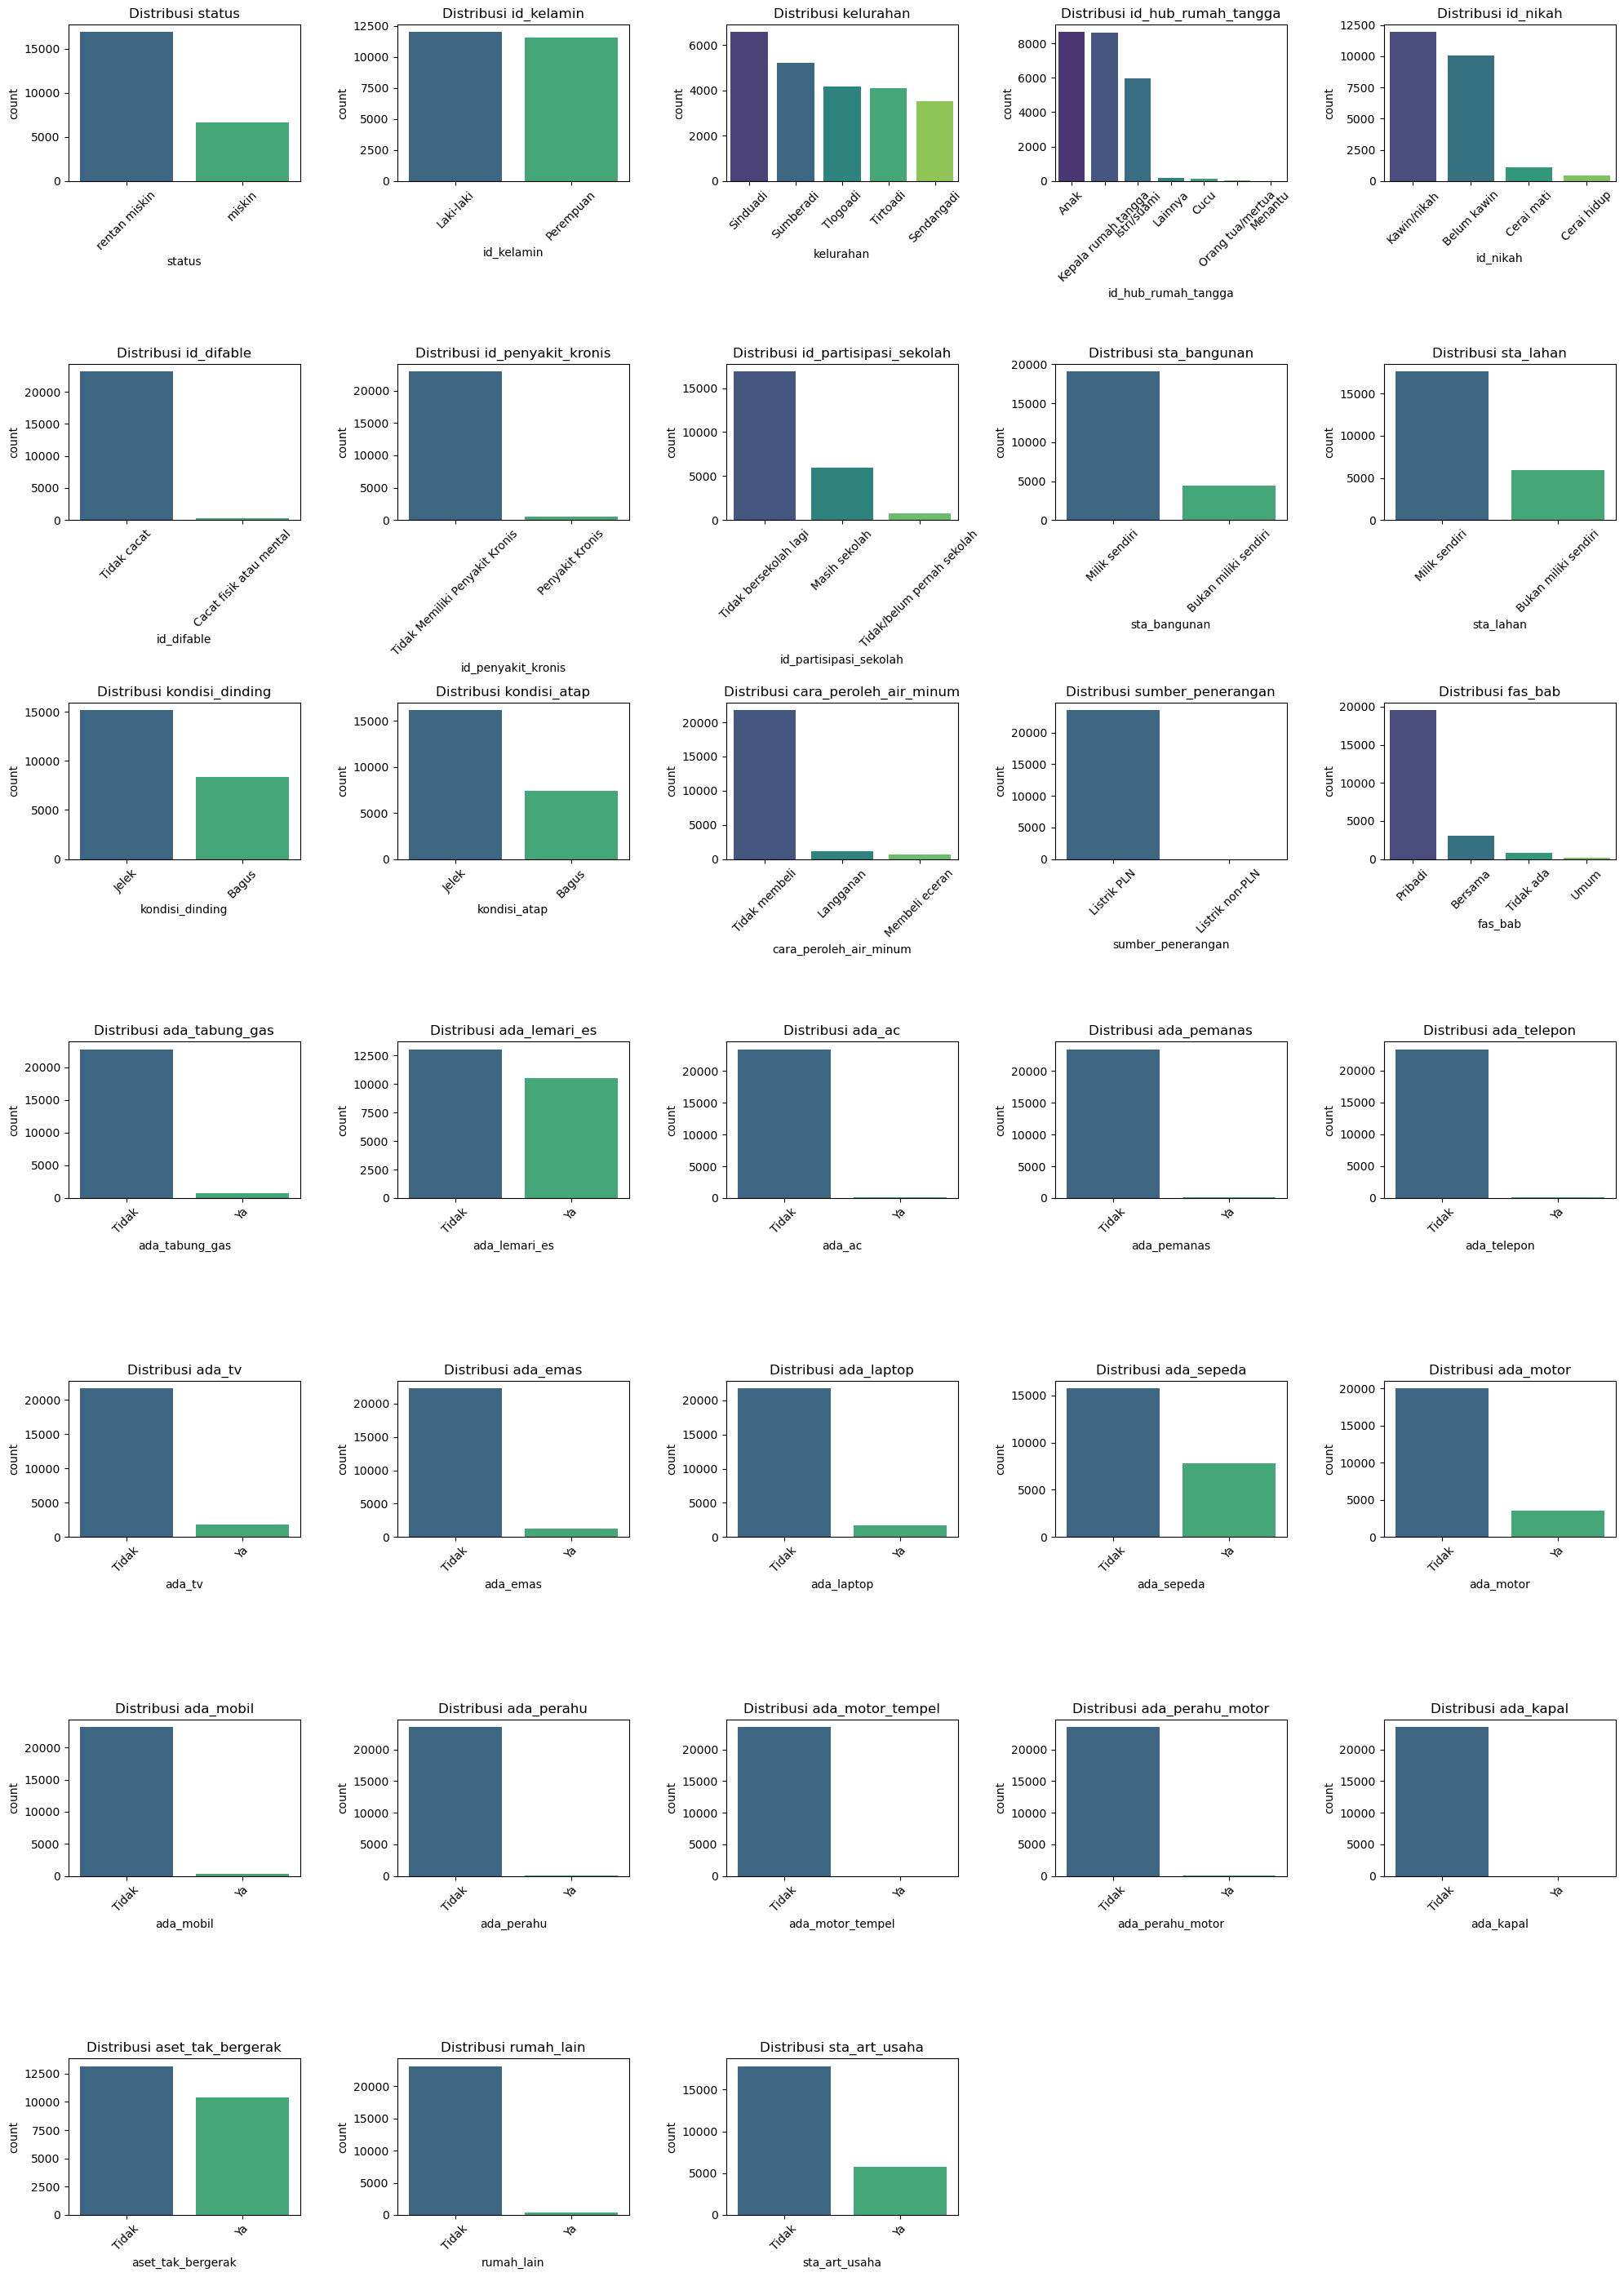

In [33]:
# Analisis Distribusi Data Kategorikal 
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

n_cols = 5
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 4))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=column, palette='viridis', order=df[column].value_counts().index)
    plt.title(f'Distribusi {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

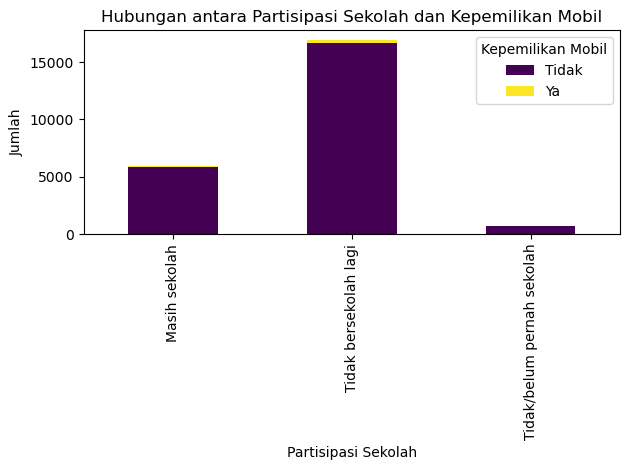

In [34]:
# Hubungan antara id_partisipasi_sekolah dan kepemilikan mobil
plt.figure(figsize=(10, 6))
crosstab = pd.crosstab(df['id_partisipasi_sekolah'], df['ada_mobil'])
crosstab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Hubungan antara Partisipasi Sekolah dan Kepemilikan Mobil')
plt.xlabel('Partisipasi Sekolah')
plt.ylabel('Jumlah')
plt.legend(title='Kepemilikan Mobil')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

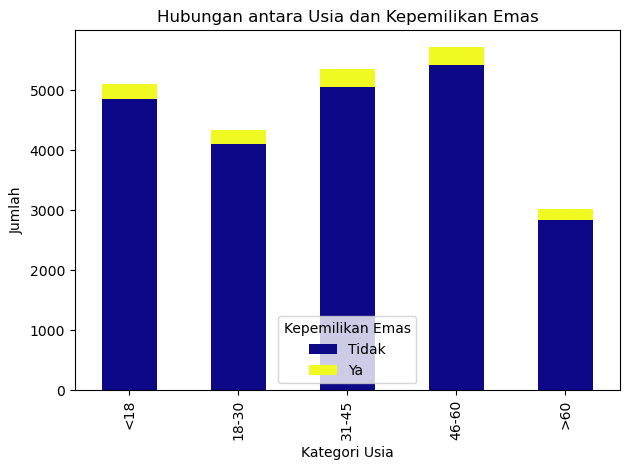

In [35]:
# Hubungan antara usia dan kepemilikan aset
plt.figure(figsize=(12, 8))
# Membuat kategori usia untuk memudahkan visualisasi
df['kategori_usia'] = pd.cut(df['usia'], bins=[0, 18, 30, 45, 60, 100], labels=['<18', '18-30', '31-45', '46-60', '>60'])
crosstab = pd.crosstab(df['kategori_usia'], df['ada_emas'])
crosstab.plot(kind='bar', stacked=True, colormap='plasma')
plt.title('Hubungan antara Usia dan Kepemilikan Emas')
plt.xlabel('Kategori Usia')
plt.ylabel('Jumlah')
plt.legend(title='Kepemilikan Emas')
plt.tight_layout()
plt.show()

Kita bisa melihat hubungan antara usia dan emas serta pendidikan dan kepmeilkan mobil, yang menandakan data data yang ada disini 96% ialah orang yang miskin atau tidak mampu

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

Berdasarkan dari info yang kita terima terdapat 44 colom data, namun tidak semua kolom kita akan pakai, kita akan pilih beberapa kolom yang relevan dengan faktor kemiskinan / kesejahteraan berdasrkan wawasan dasar yang saya miliki

In [36]:
# Pemilihan fitur yang relevan untuk clustering
selected_features = [
    # demografi dan status keluarga serta Kondisi kesehatan
    'jml_anggota_keluarga', 'id_difable', 'id_penyakit_kronis',
    
    # pendidikan
    'id_partisipasi_sekolah',
    
    # kondisi hunian
    'sta_bangunan', 'sta_lahan', 'luas_lantai', 'lantai', 'dinding',
    'kondisi_dinding', 'atap', 'kondisi_atap', 'jumlah_kamar',
    
    # fasilitas dan utilitas
    'sumber_air_minum', 'cara_peroleh_air_minum', 'sumber_penerangan',
    'daya', 'bb_masak', 'fas_bab', 'kloset', 'buang_tinja',
    
    # aset dan kepemilikan
    'ada_tabung_gas', 'ada_lemari_es', 'ada_ac', 'ada_pemanas',
    'ada_telepon', 'ada_tv', 'ada_emas', 'ada_laptop',
    'ada_sepeda', 'ada_motor', 'ada_mobil', 'aset_tak_bergerak',
    'rumah_lain', 'sta_art_usaha'
]

# total fitur yang dipilih
len(selected_features)

35

In [37]:
# Memastikan semua fitur yang dipilih ada dalam dataset
selected_features = [feature for feature in selected_features if feature in df.columns]

In [39]:
# Membuat subset data dengan fitur yang dipilih
data_for_clustering = df[selected_features].copy()
data_for_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23567 entries, 0 to 23566
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   jml_anggota_keluarga    23567 non-null  int64  
 1   id_difable              23567 non-null  object 
 2   id_penyakit_kronis      23567 non-null  object 
 3   id_partisipasi_sekolah  23567 non-null  object 
 4   sta_bangunan            23567 non-null  object 
 5   sta_lahan               23567 non-null  object 
 6   luas_lantai             23567 non-null  float64
 7   lantai                  23567 non-null  float64
 8   dinding                 23567 non-null  float64
 9   kondisi_dinding         23567 non-null  object 
 10  atap                    23567 non-null  float64
 11  kondisi_atap            23567 non-null  object 
 12  jumlah_kamar            23567 non-null  float64
 13  sumber_air_minum        23567 non-null  float64
 14  cara_peroleh_air_minum  23567 non-null

Jadi dari 44 fitur kita akan memilih 38 fitur untuk di proses

Beberapa fitur numerical butuh kita atasi outlier berdasrkan data outlier yang telah kita temukan di part 4. Terkhususnya luas_lantai, jumlah_kamar yang sangat sedikit jauh dari sebenernya mungkin terjadinya human eror. Sedangkan data outlier yang lain pada kolom yang bebeda memamng mungkin aslinya seperti itu.

Beriku code untuk mengatasi masalah ini.

In [41]:
# Fitur yang ingin difilter dari outlier
features_to_filter = ['luas_lantai', 'jumlah_kamar']

# Salin dulu data agar tidak merusak aslinya
cleaned_data = data_for_clustering.copy()

# Terapkan IQR filtering untuk masing-masing fitur
for feature in features_to_filter:
    Q1 = cleaned_data[feature].quantile(0.25)
    Q3 = cleaned_data[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Filter baris yang tidak outlier pada fitur ini
    condition = (cleaned_data[feature] >= (Q1 - 1.5 * IQR)) & (cleaned_data[feature] <= (Q3 + 1.5 * IQR))
    cleaned_data = cleaned_data[condition]

# Update kembali data_for_clustering
data_for_clustering = cleaned_data

# Cek hasilnya
print(f"Jumlah data setelah outlier dihapus: {len(data_for_clustering)} baris")


Jumlah data setelah outlier dihapus: 22342 baris


In [42]:
data_for_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22342 entries, 0 to 23566
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   jml_anggota_keluarga    22342 non-null  int64  
 1   id_difable              22342 non-null  object 
 2   id_penyakit_kronis      22342 non-null  object 
 3   id_partisipasi_sekolah  22342 non-null  object 
 4   sta_bangunan            22342 non-null  object 
 5   sta_lahan               22342 non-null  object 
 6   luas_lantai             22342 non-null  float64
 7   lantai                  22342 non-null  float64
 8   dinding                 22342 non-null  float64
 9   kondisi_dinding         22342 non-null  object 
 10  atap                    22342 non-null  float64
 11  kondisi_atap            22342 non-null  object 
 12  jumlah_kamar            22342 non-null  float64
 13  sumber_air_minum        22342 non-null  float64
 14  cara_peroleh_air_minum  22342 non-null  obj

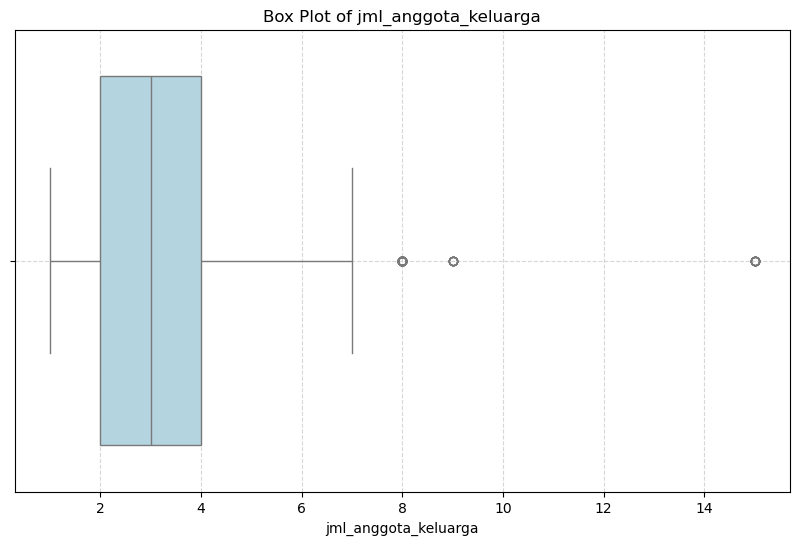

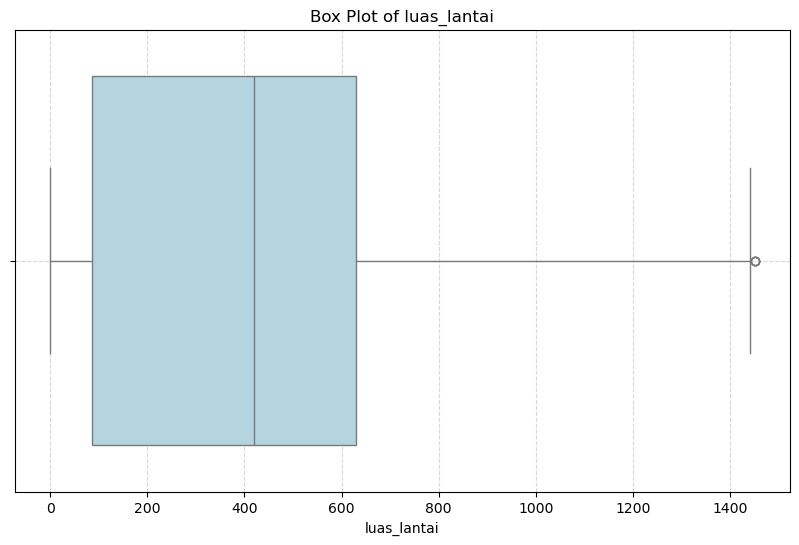

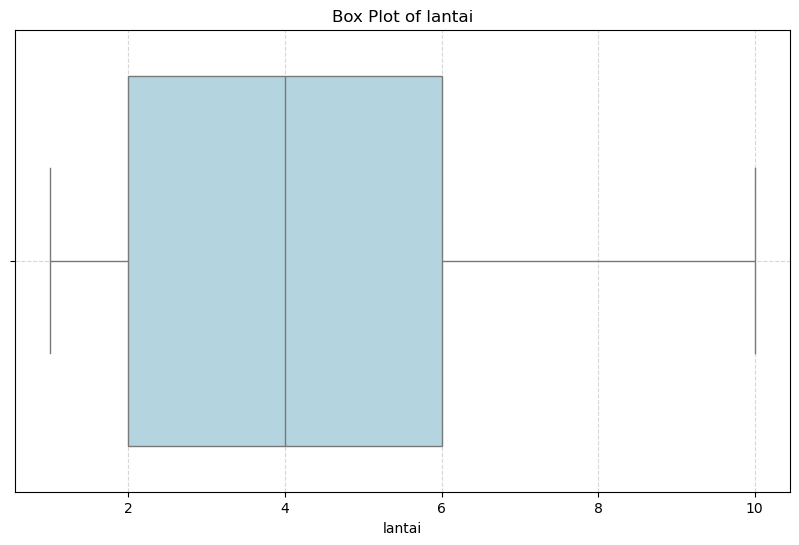

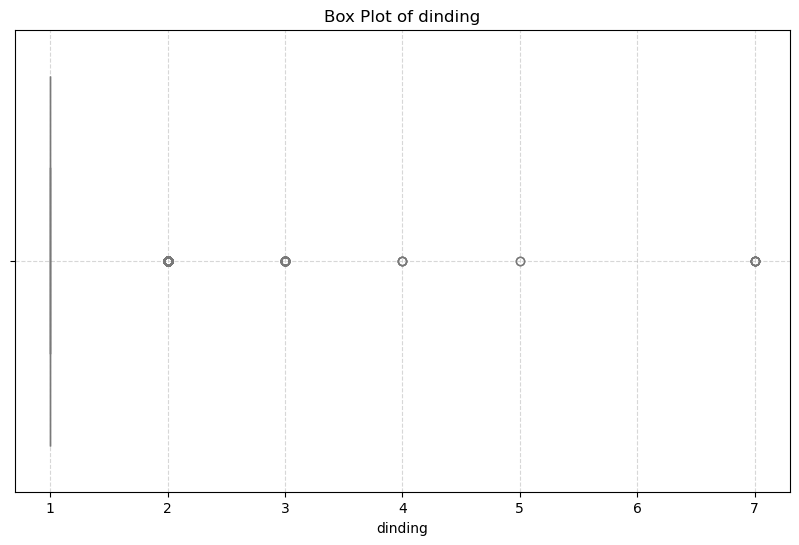

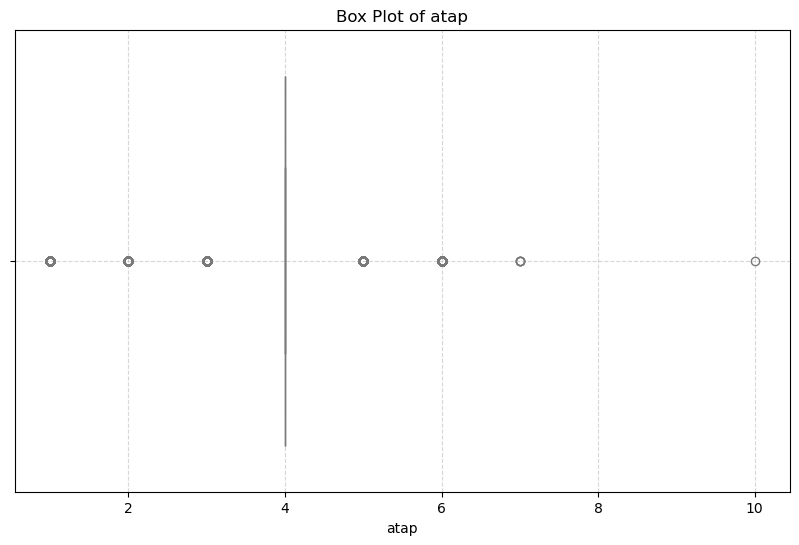

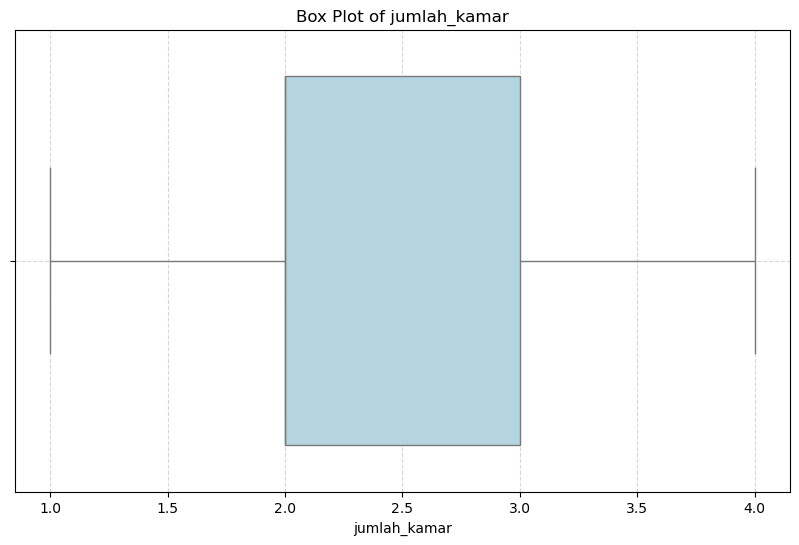

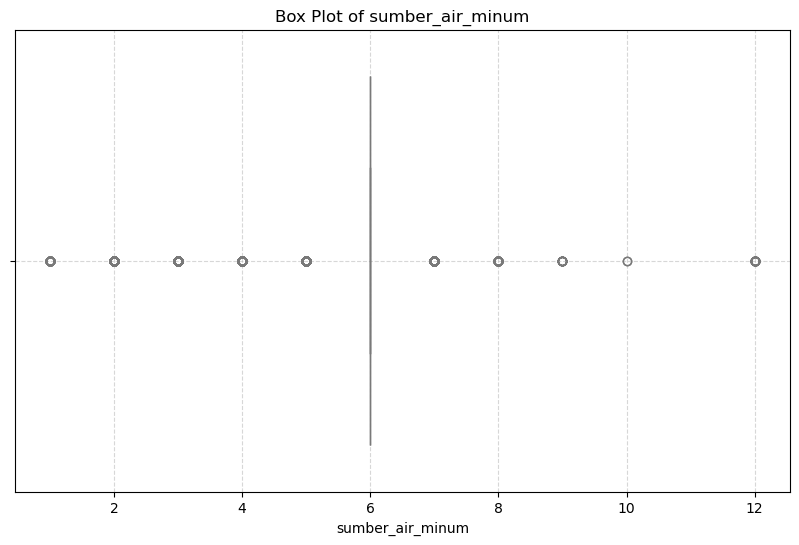

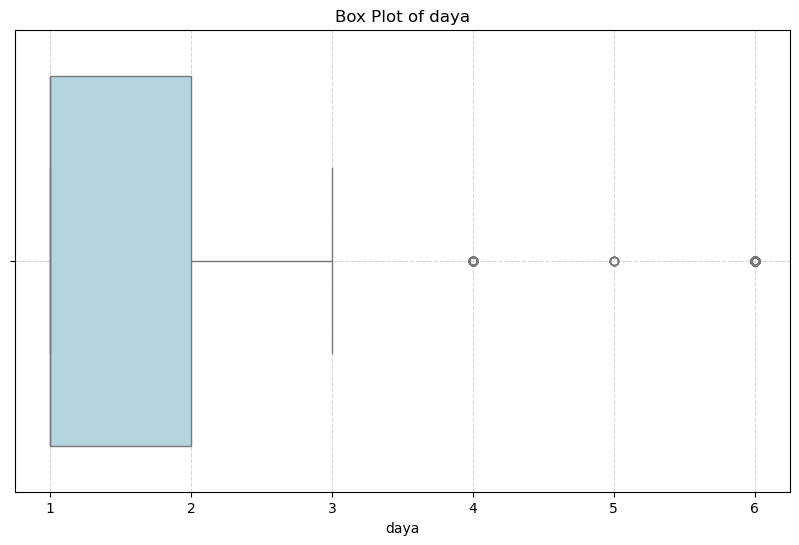

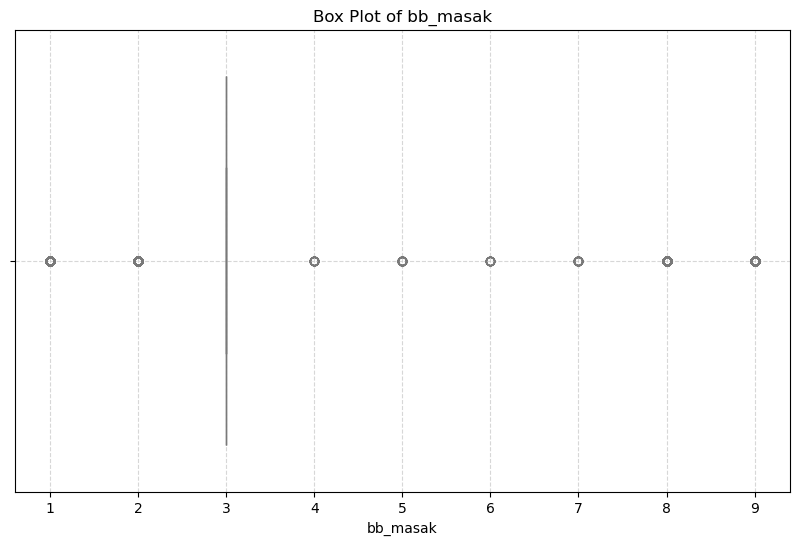

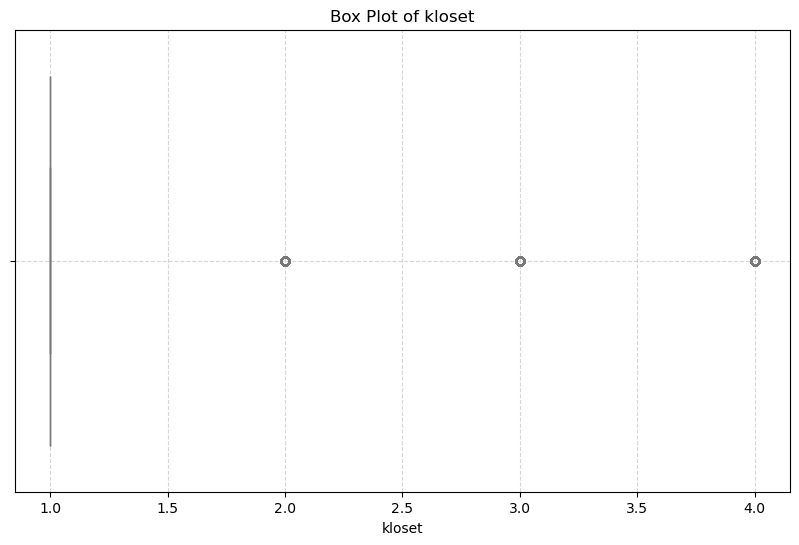

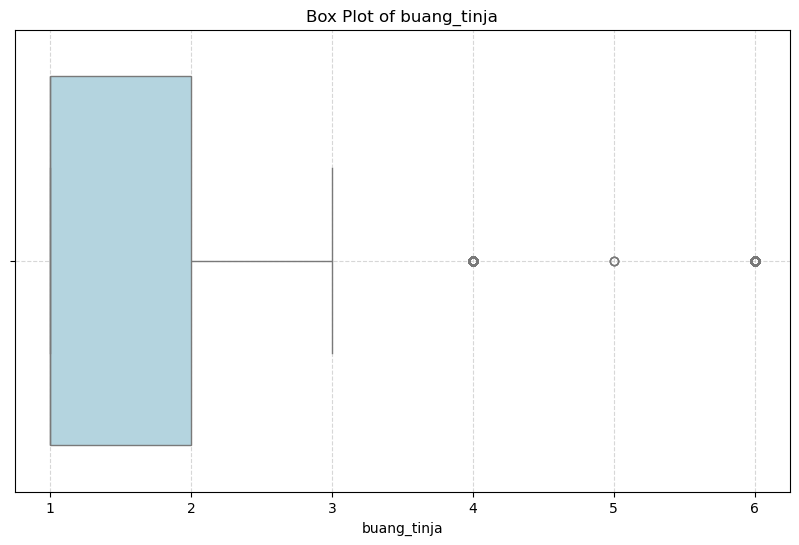

In [43]:
# Ambil semua kolom numerik
numerical_columns_after_select = data_for_clustering.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Loop satu per satu dan tampilkan boxplot
for feature in numerical_columns_after_select:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data_for_clustering[feature], color='lightblue')
    plt.title(f'Box Plot of {feature}')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


Outlier sudah ditangani

Sekarang kita akan melakukan Encoding Data Kategorikal
Encoding diterapkan pada fitur kategorikal dalam dataset untuk mempersiapkan data bagi algoritma pembelajaran mesin. Kita akan menggunakan value yang sudah di tetapkan oleh pemilik data sebelumnya untuk mengonversi nilai kategorikal menjadi format numerik yang dapat diproses oleh model.

In [44]:
# Salin data agar tidak merusak aslinya (opsional)
encoded_data = data_for_clustering.copy()

# Mapping manual kategori ke angka sesuai definisi awal

# id_difable dan id_penyakit_kronis
encoded_data['id_difable'] = encoded_data['id_difable'].replace({
    'Tidak cacat': 0, 'Cacat fisik atau mental': 1
})
encoded_data['id_penyakit_kronis'] = encoded_data['id_penyakit_kronis'].replace({
    'Tidak Memiliki Penyakit Kronis': 0, 'Penyakit Kronis': 1
})

# id_partisipasi_sekolah
encoded_data['id_partisipasi_sekolah'] = encoded_data['id_partisipasi_sekolah'].replace({
    'Tidak/belum pernah sekolah': 0,
    'Masih sekolah': 1,
    'Tidak bersekolah lagi': 2
})

# sta_bangunan dan sta_lahan
encoded_data['sta_bangunan'] = encoded_data['sta_bangunan'].replace({'Milik sendiri': 1, 'Bukan miliki sendiri': 0})
encoded_data['sta_lahan'] = encoded_data['sta_lahan'].replace({'Milik sendiri': 1, 'Bukan miliki sendiri': 0})

# kondisi_dinding dan kondisi_atap
encoded_data['kondisi_dinding'] = encoded_data['kondisi_dinding'].replace({'Bagus': 1, 'Jelek': 0})
encoded_data['kondisi_atap'] = encoded_data['kondisi_atap'].replace({'Bagus': 1, 'Jelek': 0})

# cara_peroleh_air_minum
encoded_data['cara_peroleh_air_minum'] = encoded_data['cara_peroleh_air_minum'].replace({
    'Membeli eceran': 1,
    'Langganan': 2,
    'Tidak membeli': 3
})

# sumber_penerangan
encoded_data['sumber_penerangan'] = encoded_data['sumber_penerangan'].replace({
    'Listrik PLN': 1,
    'Listrik non-PLN': 0
})

# fas_bab
encoded_data['fas_bab'] = encoded_data['fas_bab'].replace({
    'Pribadi': 1,
    'Bersama': 2,
    'Umum': 3,
    'Tidak ada': 4
})

# Boolean: Ya/Tidak jadi 1/0
bool_cols = ['ada_tabung_gas', 'ada_lemari_es', 'ada_ac', 'ada_pemanas',
             'ada_telepon', 'ada_tv', 'ada_emas', 'ada_laptop',
             'ada_sepeda', 'ada_motor', 'ada_mobil', 'aset_tak_bergerak',
             'rumah_lain', 'sta_art_usaha']

for col in bool_cols:
    if col in encoded_data.columns:
        encoded_data[col] = encoded_data[col].replace({'Ya': 1, 'Tidak': 0})


# Kembalikan ke variabel utama
data_for_clustering = encoded_data.copy()
data_for_clustering.head()


,jml_anggota_keluarga,id_difable,id_penyakit_kronis,id_partisipasi_sekolah,sta_bangunan,sta_lahan,luas_lantai,lantai,dinding,kondisi_dinding,...,ada_telepon,ada_tv,ada_emas,ada_laptop,ada_sepeda,ada_motor,ada_mobil,aset_tak_bergerak,rumah_lain,sta_art_usaha
0,3,0,0,2,0,0,70.0,4.0,1.0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,0,0,2,0,0,70.0,4.0,1.0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,0,0,2,0,0,70.0,4.0,1.0,0,...,0,0,0,0,0,0,0,1,0,0
6,3,0,0,1,1,1,4.0,6.0,1.0,0,...,0,0,0,0,1,0,0,1,0,0
7,3,0,0,2,1,1,4.0,6.0,1.0,0,...,0,0,0,0,1,0,0,1,0,0


In [45]:
data_for_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22342 entries, 0 to 23566
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   jml_anggota_keluarga    22342 non-null  int64  
 1   id_difable              22342 non-null  int64  
 2   id_penyakit_kronis      22342 non-null  int64  
 3   id_partisipasi_sekolah  22342 non-null  int64  
 4   sta_bangunan            22342 non-null  int64  
 5   sta_lahan               22342 non-null  int64  
 6   luas_lantai             22342 non-null  float64
 7   lantai                  22342 non-null  float64
 8   dinding                 22342 non-null  float64
 9   kondisi_dinding         22342 non-null  int64  
 10  atap                    22342 non-null  float64
 11  kondisi_atap            22342 non-null  int64  
 12  jumlah_kamar            22342 non-null  float64
 13  sumber_air_minum        22342 non-null  float64
 14  cara_peroleh_air_minum  22342 non-null  int

Okey kita perhatikan disini, semua data telah kita ubah menjadi Numerikal.

Sekarang kita akan mengatasi scaling (Normalisasi) atau sering disebut standarisasi. Standardisasi penting untuk memastikan bahwa semua fitur dalam dataset memiliki skala yang sama sehingga mempermudah model untuk belajar dengan lebih baik dan memberikan hasil yang lebih akurat serta stabil. Berikut Code nya

In [46]:
# Memastikan hanya data dengan tipe numerikal yang akan diproses
numerical_columns_after_encode = data_for_clustering.select_dtypes(include=['number']).columns
 
## Standardisasi (mean = 0, std = 1)
scaler = StandardScaler()
data_for_clustering[numerical_columns_after_encode] = scaler.fit_transform(data_for_clustering[numerical_columns_after_encode])


In [47]:
data_for_clustering.describe()

,jml_anggota_keluarga,id_difable,id_penyakit_kronis,id_partisipasi_sekolah,sta_bangunan,sta_lahan,luas_lantai,lantai,dinding,kondisi_dinding,...,ada_telepon,ada_tv,ada_emas,ada_laptop,ada_sepeda,ada_motor,ada_mobil,aset_tak_bergerak,rumah_lain,sta_art_usaha
count,2.234200e+04,2.234200e+04,2.234200e+04,2.234200e+04,2.234200e+04,2.234200e+04,2.234200e+04,2.234200e+04,2.234200e+04,2.234200e+04,...,2.234200e+04,2.234200e+04,2.234200e+04,2.234200e+04,2.234200e+04,2.234200e+04,2.234200e+04,2.234200e+04,2.234200e+04,2.234200e+04
mean,-1.755526e-16,3.816361e-18,-1.208514e-17,-1.240317e-16,1.272120e-17,9.159265e-17,-2.035392e-17,-1.831853e-16,-2.696895e-16,1.373890e-16,...,-3.816361e-17,1.780968e-17,1.119466e-16,-3.307513e-17,-7.123873e-17,2.544240e-17,-5.088481e-18,-1.272120e-17,-2.735058e-17,-1.526544e-17
std,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,...,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00
min,-1.841724e+00,-1.214962e-01,-1.581248e-01,-3.187183e+00,-2.054287e+00,-1.703682e+00,-1.283014e+00,-1.556512e+00,-9.608123e-02,-7.275515e-01,...,-8.412404e-02,-2.962840e-01,-2.270169e-01,-2.801608e-01,-7.107179e-01,-4.185861e-01,-1.270665e-01,-9.065888e-01,-1.294105e-01,-5.539453e-01
25%,-1.053044e+00,-1.214962e-01,-1.581248e-01,-1.295264e+00,4.867870e-01,-1.703682e+00,-1.024302e+00,-1.073692e+00,-9.608123e-02,-7.275515e-01,...,-8.412404e-02,-2.962840e-01,-2.270169e-01,-2.801608e-01,-7.107179e-01,-4.185861e-01,-1.270665e-01,-9.065888e-01,-1.294105e-01,-5.539453e-01
50%,-2.643641e-01,-1.214962e-01,-1.581248e-01,5.966548e-01,4.867870e-01,5.869640e-01,-1.953989e-02,-1.080521e-01,-9.608123e-02,-7.275515e-01,...,-8.412404e-02,-2.962840e-01,-2.270169e-01,-2.801608e-01,-7.107179e-01,-4.185861e-01,-1.270665e-01,-9.065888e-01,-1.294105e-01,-5.539453e-01
75%,5.243157e-01,-1.214962e-01,-1.581248e-01,5.966548e-01,4.867870e-01,5.869640e-01,6.121970e-01,8.575880e-01,-9.608123e-02,1.374473e+00,...,-8.412404e-02,-2.962840e-01,-2.270169e-01,-2.801608e-01,1.407028e+00,-4.185861e-01,-1.270665e-01,1.103036e+00,-1.294105e-01,-5.539453e-01
max,9.199794e+00,8.230712e+00,6.324120e+00,5.966548e-01,4.867870e-01,5.869640e-01,3.078979e+00,2.788868e+00,3.218432e+01,1.374473e+00,...,1.188721e+01,3.375140e+00,4.404958e+00,3.569379e+00,1.407028e+00,2.388995e+00,7.869893e+00,1.103036e+00,7.727351e+00,1.805232e+00


Untuk lebih detailnya, mari kita lihat visualisainya ini

Jumlah kolom numerik: 35
Kolom numerik: ['jml_anggota_keluarga', 'id_difable', 'id_penyakit_kronis', 'id_partisipasi_sekolah', 'sta_bangunan', 'sta_lahan', 'luas_lantai', 'lantai', 'dinding', 'kondisi_dinding', 'atap', 'kondisi_atap', 'jumlah_kamar', 'sumber_air_minum', 'cara_peroleh_air_minum', 'sumber_penerangan', 'daya', 'bb_masak', 'fas_bab', 'kloset', 'buang_tinja', 'ada_tabung_gas', 'ada_lemari_es', 'ada_ac', 'ada_pemanas', 'ada_telepon', 'ada_tv', 'ada_emas', 'ada_laptop', 'ada_sepeda', 'ada_motor', 'ada_mobil', 'aset_tak_bergerak', 'rumah_lain', 'sta_art_usaha']


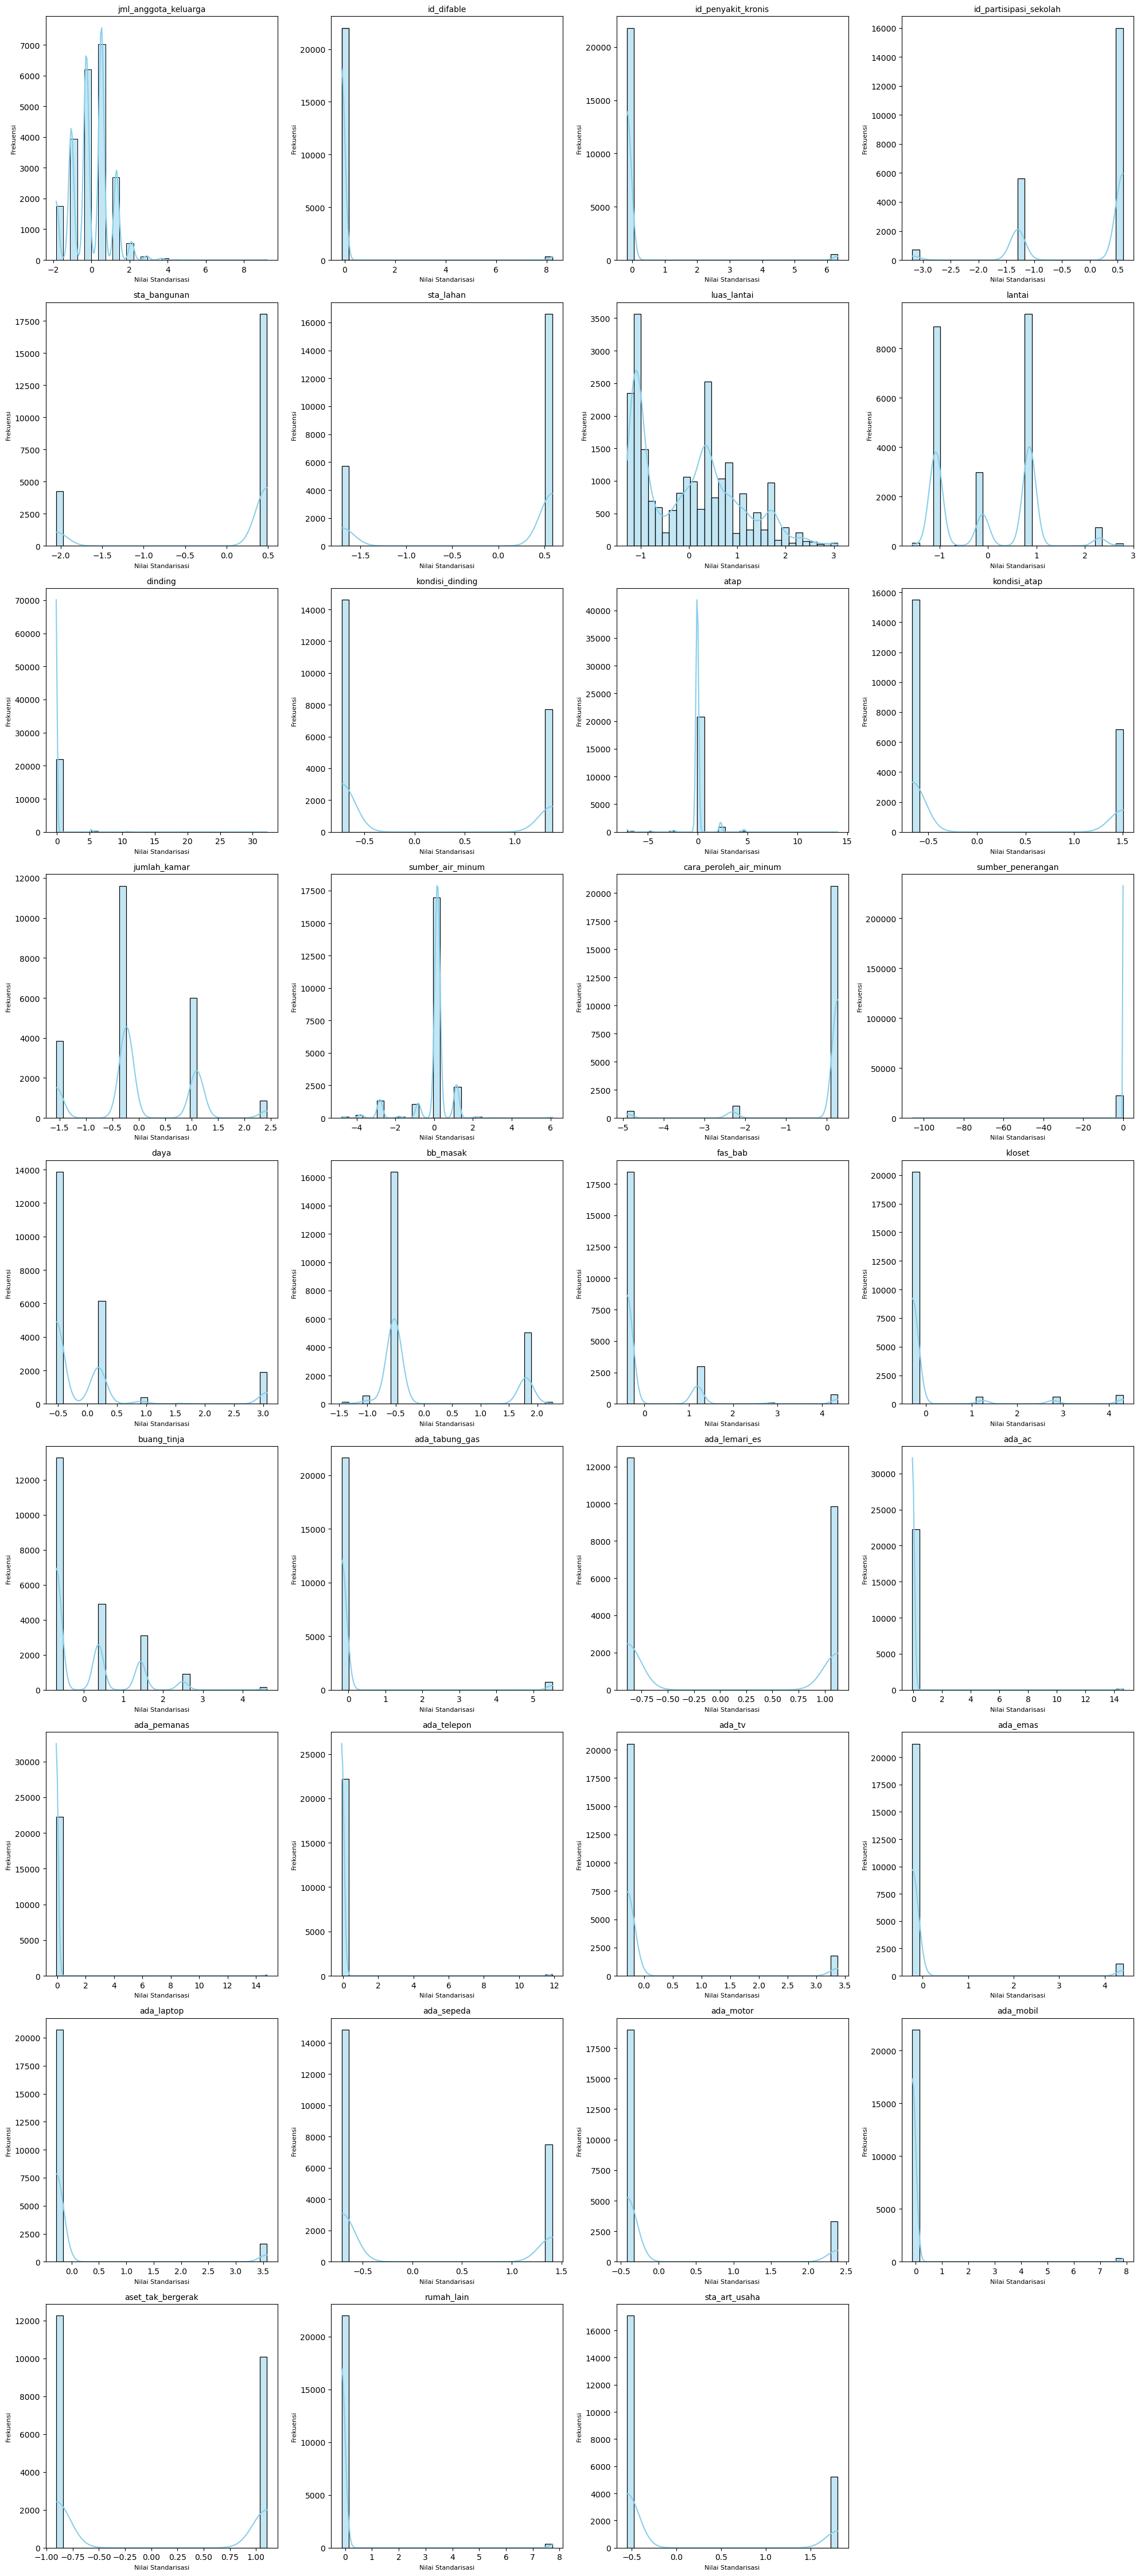

In [49]:
# Pastikan hanya kolom numerik yang divisualisasi
numerical_columns_after_encode = data_for_clustering.select_dtypes(include=['number']).columns
print(f"Jumlah kolom numerik: {len(numerical_columns_after_encode)}")
print("Kolom numerik:", numerical_columns_after_encode.tolist())

# Tentukan ukuran subplot berdasarkan jumlah fitur (38 fitur)
n_cols = 4  # Jumlah kolom dalam grid
n_rows = int(np.ceil(len(numerical_columns_after_encode) / n_cols))  # Jumlah baris, dibulatkan ke atas

# Buat figure dan axes untuk subplot
plt.figure(figsize=(20, 5 * n_rows))  # Ukuran total figure disesuaikan

# Iterasi untuk setiap kolom numerik
for i, column in enumerate(numerical_columns_after_encode):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=data_for_clustering, x=column, kde=True, bins=30, color='skyblue')
    plt.title(f'{column}', fontsize=10)
    plt.xlabel('Nilai Standarisasi', fontsize=8)
    plt.ylabel('Frekuensi', fontsize=8)
    plt.tight_layout()

# Tampilkan visualisasi
plt.show()

Ini akan mengubah semua nilai numerik agar:
- Mean-nya 0
- Standard deviation-nya 1

Tujuannya agar model seperti K-Means nggak bias terhadap skala fitur yang besar kecil (contoh: luas_lantai bisa punya range besar, tapi id_nikah cuma 1-4).

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

Saya akan menggunakan K-Means

Saya telah menentukan K diawal yaitu ada 3 Cluster
1. Sangat Membutuhkan Bantuan
2. Membutuhkan Bantuan
3. Belum Membutuhkan Bantuan

Namun pada part selanjutnya akan ada penentuan ulang K yang lebih optimal dengan menggunakan Elbow namun saat ini kita menggunkan K yang sudah saya tentukan

In [50]:
data_for_clustering.describe()

,jml_anggota_keluarga,id_difable,id_penyakit_kronis,id_partisipasi_sekolah,sta_bangunan,sta_lahan,luas_lantai,lantai,dinding,kondisi_dinding,...,ada_telepon,ada_tv,ada_emas,ada_laptop,ada_sepeda,ada_motor,ada_mobil,aset_tak_bergerak,rumah_lain,sta_art_usaha
count,2.234200e+04,2.234200e+04,2.234200e+04,2.234200e+04,2.234200e+04,2.234200e+04,2.234200e+04,2.234200e+04,2.234200e+04,2.234200e+04,...,2.234200e+04,2.234200e+04,2.234200e+04,2.234200e+04,2.234200e+04,2.234200e+04,2.234200e+04,2.234200e+04,2.234200e+04,2.234200e+04
mean,-1.755526e-16,3.816361e-18,-1.208514e-17,-1.240317e-16,1.272120e-17,9.159265e-17,-2.035392e-17,-1.831853e-16,-2.696895e-16,1.373890e-16,...,-3.816361e-17,1.780968e-17,1.119466e-16,-3.307513e-17,-7.123873e-17,2.544240e-17,-5.088481e-18,-1.272120e-17,-2.735058e-17,-1.526544e-17
std,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,...,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00
min,-1.841724e+00,-1.214962e-01,-1.581248e-01,-3.187183e+00,-2.054287e+00,-1.703682e+00,-1.283014e+00,-1.556512e+00,-9.608123e-02,-7.275515e-01,...,-8.412404e-02,-2.962840e-01,-2.270169e-01,-2.801608e-01,-7.107179e-01,-4.185861e-01,-1.270665e-01,-9.065888e-01,-1.294105e-01,-5.539453e-01
25%,-1.053044e+00,-1.214962e-01,-1.581248e-01,-1.295264e+00,4.867870e-01,-1.703682e+00,-1.024302e+00,-1.073692e+00,-9.608123e-02,-7.275515e-01,...,-8.412404e-02,-2.962840e-01,-2.270169e-01,-2.801608e-01,-7.107179e-01,-4.185861e-01,-1.270665e-01,-9.065888e-01,-1.294105e-01,-5.539453e-01
50%,-2.643641e-01,-1.214962e-01,-1.581248e-01,5.966548e-01,4.867870e-01,5.869640e-01,-1.953989e-02,-1.080521e-01,-9.608123e-02,-7.275515e-01,...,-8.412404e-02,-2.962840e-01,-2.270169e-01,-2.801608e-01,-7.107179e-01,-4.185861e-01,-1.270665e-01,-9.065888e-01,-1.294105e-01,-5.539453e-01
75%,5.243157e-01,-1.214962e-01,-1.581248e-01,5.966548e-01,4.867870e-01,5.869640e-01,6.121970e-01,8.575880e-01,-9.608123e-02,1.374473e+00,...,-8.412404e-02,-2.962840e-01,-2.270169e-01,-2.801608e-01,1.407028e+00,-4.185861e-01,-1.270665e-01,1.103036e+00,-1.294105e-01,-5.539453e-01
max,9.199794e+00,8.230712e+00,6.324120e+00,5.966548e-01,4.867870e-01,5.869640e-01,3.078979e+00,2.788868e+00,3.218432e+01,1.374473e+00,...,1.188721e+01,3.375140e+00,4.404958e+00,3.569379e+00,1.407028e+00,2.388995e+00,7.869893e+00,1.103036e+00,7.727351e+00,1.805232e+00


In [51]:
from sklearn.cluster import KMeans
import pandas as pd

# Anggap data_for_clustering adalah DataFrame
X = data_for_clustering.values  # Ambil nilai numeriknya untuk KMeans

# Inisialisasi dan latih model KMeans dengan jumlah cluster = 3
k = 3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Mendapatkan label cluster
labels = kmeans.labels_

# Tambahkan label ke DataFrame agar mudah dianalisis
data_with_labels = data_for_clustering.copy()
data_with_labels['cluster'] = labels

# Fungsi untuk analisis rata-rata semua fitur per cluster
def analyze_clusters(df, k):
    print("Analisis Karakteristik Setiap Cluster (Rata-rata setiap fitur):\n")
    for cluster_id in range(k):
        print(f"Cluster {cluster_id + 1}:")
        cluster_mean = df[df['cluster'] == cluster_id].mean(numeric_only=True)
        print(cluster_mean)
        print("-" * 50)

# Jalankan analisis
analyze_clusters(data_with_labels, k)


Analisis Karakteristik Setiap Cluster (Rata-rata setiap fitur):

Cluster 1:
jml_anggota_keluarga     -0.109800
id_difable               -0.023065
id_penyakit_kronis       -0.008543
id_partisipasi_sekolah    0.081187
sta_bangunan              0.440925
sta_lahan                 0.477472
luas_lantai               0.511363
lantai                    0.251775
dinding                  -0.039328
kondisi_dinding           0.060145
atap                     -0.025992
kondisi_atap              0.077492
jumlah_kamar              0.048245
sumber_air_minum          0.113464
cara_peroleh_air_minum    0.061430
sumber_penerangan        -0.007960
daya                     -0.039281
bb_masak                  0.326323
fas_bab                  -0.021246
kloset                   -0.028590
buang_tinja              -0.388553
ada_tabung_gas           -0.024721
ada_lemari_es            -0.268673
ada_ac                   -0.026010
ada_pemanas              -0.029825
ada_telepon              -0.012103
ada_tv        

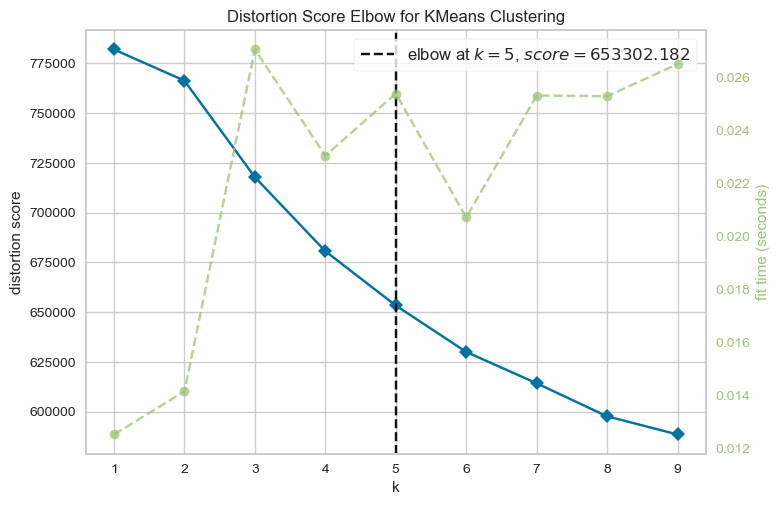

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
from yellowbrick.cluster import KElbowVisualizer
# Inisialisasi model KMeans
kmeans = KMeans(random_state=42)

# Inisialisasi visualizer KElbow untuk rentang K 1-10
visualizer = KElbowVisualizer(kmeans, k=(1, 10), timings=True)

# Fit visualizer ke data
visualizer.fit(X)

# Tampilkan grafik elbow
visualizer.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# Type your code here


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.